# Tutorial: Getting Ready to Make an Invariant Mass Distribution

In the first tutorial we learned how to open a root file and plot branches. This provided you with the skills to plot the E, pt, pz, eta, and phi distributions of the dilepton samples. In the next part of the project we want you to use your skills and knowledge from class to discovery the Z boson by reconstruct the invariant mass distribution. You'll need to use your knowledge of 4-vectors to do this. Once you have the distribution you will want to perform a fit the distribution to a Gaussian to extract the mean and standard deviation. 

To help you with this, in this tutorial we will go through how to fit to a distribution. 

# Fit to Distribution

Fitted mean and standard deviation: 0.03207629396280063, 1.464256200194456


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  if sys.path[0] == '':


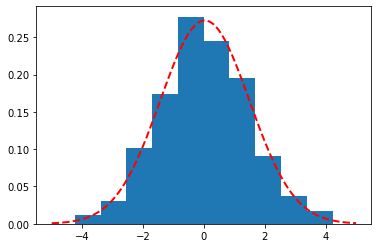

In [24]:
import numpy as np
from iminuit import Minuit
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from scipy.stats import norm
from scipy.optimize import curve_fit

# First let's generate a toy gaussian
mu = 0
sigma = 1.5
gaussian = np.random.normal(mu, sigma, 1000)
n, bins, patches = plt.hist(gaussian,normed=True) # Normalized to 1. You may not want to do this in other cases.

# best fit of data
(mu, sigma) = norm.fit(gaussian)
print("Fitted mean and standard deviation: {}, {}".format(mu,sigma))

# add a 'best fit' line
x = np.linspace(-5,5,101)
y = norm.pdf( x, mu, sigma)
l = plt.plot(x, y, 'r--', linewidth=2)


# Combining Variables

In the ROOT files we have events stored in the branches. For those variables with particle level variables, such as pt, uproot hands us the branches as jagged arrays, or arrays of unequally sized arrays. Each unequally sized array contains the particle level variables of the event. We'll need you to add up the momentum of all of the particles inside of an event array.

Look below to see more concretely what this means.

In [26]:
# Example of what a branch could look like
pz = [[4, 3, 8], [10, 6], [12, 5, 2, 7, 9]]
# Above we see that we have 3 events. They have 3, 2 and 5 particles, respectively. 
# We will want to sum up the particle values within each event. We can use numpy's sum function within a loop to do this.
pz_summed = np.array([ np.sum(i) for i in pz ] )
print("Original branch of events and particles: {}".format(pz))
print("List of particle variables summed for each event: {}".format(pz_summed))

Original branch of events and particles: [[4, 3, 8], [10, 6], [12, 5, 2, 7, 9]]
List of particle variables summed for each event: [15 16 35]
